60000
10000
600
100


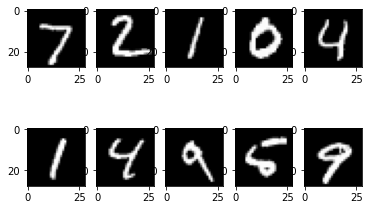

Accuracy of the network on the 10000 test images: 97.81 %


In [ ]:
## Feed Forward
# 1) Design model (input,output size, forward pass)    
# 2) construct loss and optimizer
# 3) Training loop
#       - Forward pass : compute prediction and loss
#       - Backward pass : gradients
#       - update weights
#MNIST
#will use Data Loader adn Transformation
#Mulit layer nueral net, activation function
#loss ans optimizer
#Training loop(batch training)
#model evaluation
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

training_data = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_data = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=100, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)
print(len(training_data))
print(len(test_data))
print(len(train_dataloader))
print(len(test_dataloader))
input_size=784
middle=500
middle1=500
classes = 10
num_epochs = 4
#to show data
examples = iter(test_dataloader)
example_data, example_targets = examples.next()

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()
class LinearRegression(nn.Module):
  def __init__(self,input_size,middle,classes):
    super(LinearRegression,self) .__init__()
    self.linear1=nn.Linear(input_size,middle)
    self.relu= torch.nn.functional.relu
    self.linear2=nn.Linear(middle,middle1)
    self.relu= torch.nn.functional.relu
    self.linear2=nn.Linear(middle1,classes)

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    return out
model = LinearRegression(input_size,middle,classes)
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)

for epochs in range(num_epochs):
  for i, (images, labels) in enumerate(train_dataloader):
   images = images.reshape(-1, 28*28)
   optimizer.zero_grad()
   outputs = model(images)
   loss= criterion(outputs,labels)
   loss.backward()
   optimizer.step()
   if (i+1)%100 ==0:
    print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
# test data
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_dataloader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')










